In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import scipy
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from IPython.core.display import Image, display
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from plot_sklearn_dendrogram import plot_sklearn_dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import parallel_coordinates
import graphviz 
from sklearn import tree
%matplotlib inline
np.random.seed(10)
random.seed(10)
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing # to scale data
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates

In [2]:
df_global = pds.read_csv('./Data_Classif/Data.txt', sep="\t") # load a pandas dataframe from csv
df_global.head()

,Time,Time Code,Country Name,Country Code,Children out of school,CO2,NR electricity,Life expectancy,Population,Urban population,Area,GDP,Compulsory education,Labor force,Agricultural land
0,2013,YR2013,Afghanistan,AFG,NaN,0.315602,NaN,62.494,31731688.0,24.373,652860.0,638.612543,9.0,52.855999,58.067580
1,2013,YR2013,Albania,ALB,5.63382,1.749211,0.00000,77.702,2895092.0,55.387,27400.0,4413.081697,9.0,53.652000,43.332117
2,2013,YR2013,Algeria,DZA,NaN,3.507310,99.44899,75.418,38338562.0,69.576,2381740.0,5471.123389,10.0,43.683998,17.395534
3,2013,YR2013,American Samoa,ASM,NaN,NaN,NaN,NaN,55307.0,87.348,200.0,11589.853002,NaN,NaN,24.500000
4,2013,YR2013,Andorra,AND,NaN,5.900753,NaN,NaN,80788.0,88.537,470.0,40619.711298,10.0,NaN,40.021277


On a choisi des données déjà normalisées par rapport à la pop.

## Nettoyage des lignes

Suppression des time codes.

In [3]:
df_global=df_global.drop(["Time","Time Code","Country Code"],axis=1)

Supression des lignes contenant des valeurs manquantes

In [6]:
filtered_df = df_global.dropna()
filtered_df.head()
len(filtered_df)

92

In [7]:
filtered_df

,Country Name,Children out of school,CO2,NR electricity,Life expectancy,Population,Urban population,Area,GDP,Compulsory education,Labor force,Agricultural land
1,Albania,5.633820,1.749211,0.000000,77.702000,2895092.0,55.387,27400.0,4413.081697,9.0,53.652000,43.332117
7,Argentina,0.644610,4.462904,64.000402,76.089000,42539925.0,91.249,2736690.0,12976.636425,13.0,60.403000,54.518049
10,Australia,2.507370,16.083474,86.735892,82.148780,23145901.0,85.502,7682300.0,67990.290030,10.0,65.008003,51.627156
12,Azerbaijan,6.329320,3.785069,93.041877,71.656000,9416801.0,54.145,82659.0,7875.756953,10.0,64.546997,57.704545
14,Bahrain,6.261690,23.804357,100.000000,76.482000,1315411.0,88.835,770.0,24737.171783,9.0,71.518997,11.168831
17,Belarus,6.797400,6.736652,99.054178,72.470732,9465997.0,76.199,202910.0,7978.872615,9.0,63.905998,43.004288
18,Belgium,1.966500,8.671352,31.926311,80.587805,11182817.0,97.789,30280.0,46582.669550,12.0,53.493000,44.138045
23,Bolivia,10.536800,1.818997,67.823931,67.922000,10400264.0,67.699,1083300.0,2947.938526,14.0,69.305000,34.734607
26,Brazil,6.220960,2.488417,20.546396,74.777000,202408632.0,85.209,8358140.0,12216.904464,14.0,64.228996,33.357673
28,Brunei Darussalam,2.595580,19.233592,99.954566,76.823000,405716.0,75.997,5270.0,44597.279682,9.0,67.892998,2.732448


## Normalisation des données

### Centrage

On centre les données car elles sont exprimées dans des variables différentes et ont des ordres de grandeur complètement différents.

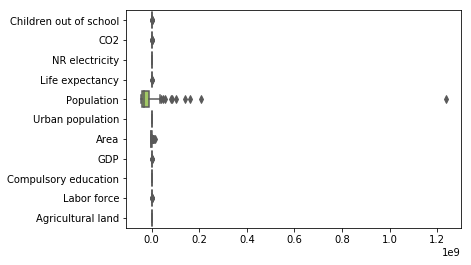

In [8]:
ax=sns.boxplot(data=(filtered_df.drop("Country Name",axis=1) - filtered_df.drop("Country Name",axis=1).mean()), orient="h", palette="Set2")

Nous devons également réduire en raison de la variance élevée de la population.

### Réduction 

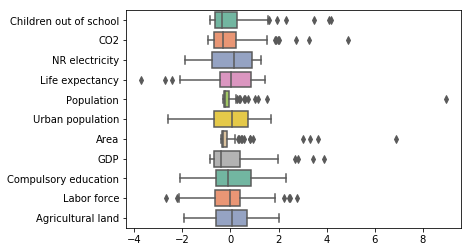

In [9]:
ax=sns.boxplot(data=((filtered_df.drop("Country Name",axis=1) - filtered_df.drop("Country Name",axis=1).mean())/filtered_df.drop("Country Name",axis=1).std()), orient="h", palette="Set2")

Ce sont les données finales sur lesquelles on va travailler.

In [10]:
dff=(filtered_df.drop("Country Name",axis=1) - filtered_df.drop("Country Name",axis=1).mean())/filtered_df.drop("Country Name",axis=1).std()
dff.head()

,Children out of school,CO2,NR electricity,Life expectancy,Population,Urban population,Area,GDP,Compulsory education,Labor force,Agricultural land
1,0.055405,-0.696201,-1.876930,0.432529,-0.291573,-0.652658,-0.370542,-0.696435,-0.612305,-0.862056,0.131700
7,-0.764361,-0.275301,0.134525,0.172820,-0.004043,1.213444,0.829788,-0.337704,1.347071,-0.108451,0.671874
10,-0.458295,1.527074,0.849074,1.148505,-0.144701,0.914395,3.020901,1.966837,-0.122461,0.405600,0.532272
12,0.169681,-0.380435,1.047264,-0.540938,-0.244274,-0.717287,-0.346060,-0.551382,-0.122461,0.354138,0.825752
14,0.158569,2.724599,1.265949,0.236097,-0.303030,1.087830,-0.382340,0.154949,-0.612305,1.132413,-1.421480


# Recherche des outliers

Comme précédemment nous allons chercher les outliers grâce à DBSCAN. La première étape sera donc de paramétriser ce modèle en traçant la distance pour chaque point à son 4e voisin plus proche grâce à l'algorithme des KNN.

## Définition des paramètres de DBSCAN

In [11]:
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(dff)
distances, indices = nbrs.kneighbors(dff)
distances_to_4 = distances[:,3]
distances_to_4 = sorted(distances_to_4 , reverse = False)

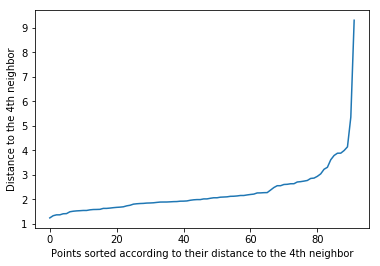

In [12]:
Index = range(0,len(distances_to_4))
plt.plot(Index , distances_to_4)
plt.xlabel('Points sorted according to their distance to the 4th neighbor')
t=plt.ylabel('Distance to the 4th neighbor')

D'après le graphique ci-dessus on observe un coude pour les pays d'indices entre 120 et 130.

In [15]:
mean_dist_knee = sum(distances_to_4[75:85])/10
mean_dist_knee

3.0023049703042854

On considérera donc un rayon de recherche d'environs 3.002, et un nombre minimum de point égal à trois, pour considérer un cluster.

## Annalyse des résultats de DBSCAN

In [18]:
outliers_det = DBSCAN(min_samples=10,eps=mean_dist_knee).fit(dff)
# Number of outliers
sum(outliers_det.labels_ == -1) 

12

In [19]:
dffl= dff.copy(deep=True) # Copy of DF_kmeans1
dffl['Labels'] = outliers_det.labels_

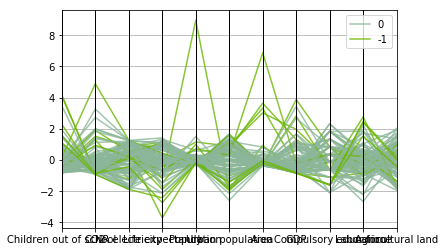

In [20]:
parallel_coordinates(dffl,'Labels', alpha=0.8)
plt.show()

In [23]:
dffc= dffl.copy(deep=True) # Copy of DF_kmeans1
dffc['Country'] = filtered_df["Country Name"] 
print(dffc[dffc['Labels'] == -1])

     Children out of school       CO2  NR electricity  Life expectancy  \
10                -0.458295  1.527074        0.849074         1.148505   
26                 0.151876 -0.581549       -1.231182        -0.038425   
35                -0.779893  1.314351       -1.219521         1.087848   
47                 4.163694 -0.892057        0.578213        -3.707523   
89                -0.497302 -0.720672        0.644399        -1.175640   
116               -0.082351  1.901622        0.536747         1.092348   
149                4.089409 -0.827246        0.137755        -1.463365   
159                0.168529  4.892265        1.265949         0.438486   
161               -0.460472  0.954760        0.204940        -0.714381   
191                2.290602 -0.933272        0.338585        -1.878610   
215                1.116630 -0.927008       -1.872440        -2.420570   
216                1.556682 -0.847216       -0.429301        -2.731158   

     Population  Urban population    